In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset1.csv')

## EDA And Preprocessing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


####  We see that out data set represent whether a customer will stop doing business with company or not and that is represened by the variable Churn

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7000 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              6896 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(4), object(1

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
#dropping Full Nans rows and duplicates 
data.dropna(how='all' ,inplace = True)
data.drop_duplicates(inplace = True)

In [7]:
#Customer ID is useless so we will drop it 
data.drop('customerID', axis=1, inplace=True)

In [8]:
data.isnull().sum()

gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [9]:
data['SeniorCitizen'].unique()

array([nan,  1.,  0.])

In [10]:
data['tenure'].unique()

array([nan, 34.,  2., 45.,  8., 22., 10., 28., 62., 13., 16., 58., 49.,
       25., 69., 52., 71., 21., 12., 30., 47., 72., 17., 27.,  5., 46.,
       11., 70., 63., 43., 15., 60., 18., 66.,  9.,  3., 31., 50., 64.,
       56.,  7., 42., 35., 48., 29., 65., 38., 68., 32., 55., 37., 36.,
       41.,  6.,  4., 33., 67., 23., 57., 61., 14., 20., 53., 40., 59.,
       24., 44., 19., 54., 51., 26., 39.,  1.])

In [11]:
#Assuming having a Partner will be a Senior Citizen 
mask = (data['Partner']  =='Yes')  & (data['SeniorCitizen'].isnull())
data.loc[mask, 'SeniorCitizen'] = 1

In [12]:
data.isnull().sum()

gender                0
SeniorCitizen        25
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [13]:
#Assuming not having a Partner won't be a Senior Citizen
mask = (data['Partner']  =='No')  & (data['SeniorCitizen'].isnull())
data.loc[mask, 'SeniorCitizen'] = 0

In [14]:
data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [15]:
data['SeniorCitizen'].unique()

array([1., 0.])

In [16]:
data['tenure'].unique()

array([nan, 34.,  2., 45.,  8., 22., 10., 28., 62., 13., 16., 58., 49.,
       25., 69., 52., 71., 21., 12., 30., 47., 72., 17., 27.,  5., 46.,
       11., 70., 63., 43., 15., 60., 18., 66.,  9.,  3., 31., 50., 64.,
       56.,  7., 42., 35., 48., 29., 65., 38., 68., 32., 55., 37., 36.,
       41.,  6.,  4., 33., 67., 23., 57., 61., 14., 20., 53., 40., 59.,
       24., 44., 19., 54., 51., 26., 39.,  1.])

### tenure is the number of months the customer has stayed with the company , so we fill the Nans of tenure with zero as we assume that they are new customers


In [17]:
data['tenure'] = data['tenure'].fillna(0)

### By Observing the number of unique Values in data we infer the Categorical Variables and the numerical Variables 

In [18]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [19]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [21]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

### Separating the data into Numerical and Categorical 

In [22]:
dt = data.nunique()
dt[(dt== 2)].index.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'], dtype=object)

In [23]:
Categorical_Features = dt[(dt <= 4)].index.values
Categorical_Features

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'], dtype=object)

In [24]:
target_index = np.argwhere(Categorical_Features=='Churn')
Categorical_Features = np.delete(Categorical_Features, target_index)
Categorical_Features

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object)

In [25]:
Numercial_Features = dt[(dt > 4)].index.values
Numercial_Features

array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)

In [26]:
target = 'Churn'

### Exploring Some relations between Variables  and themselves and Variables and Target 

### as we see mostly no outliers but some some spikes at the beginning and the end which is proably from filling the Nans done by the  data setter

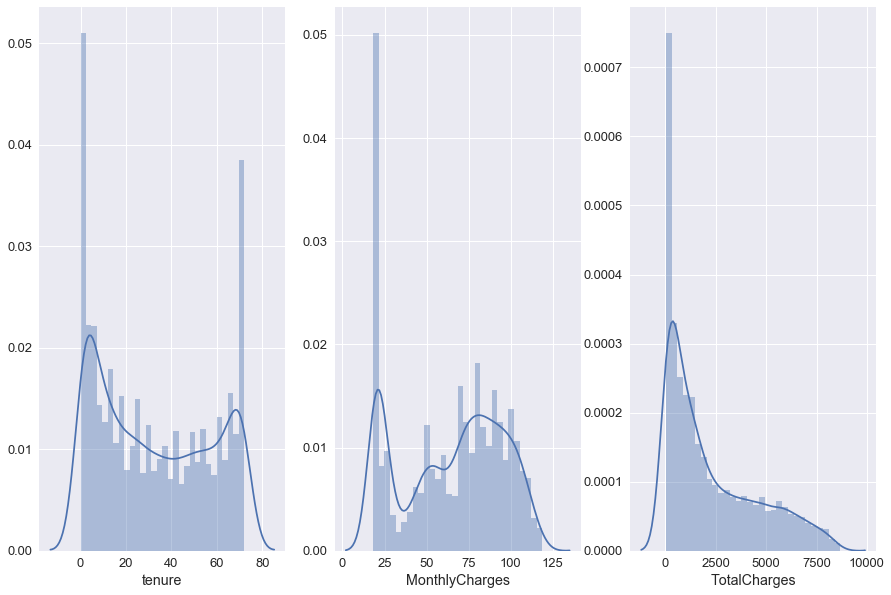

In [29]:
figure,ax = plt.subplots(1,3 ,figsize=(15,10))
sns.set(style='darkgrid', font_scale=1.3)
sns.distplot(data[Numercial_Features[0]] , ax = ax[0] ,bins = 30)
sns.distplot(data[Numercial_Features[1]] , ax = ax[1] ,bins = 30)
sns.distplot(data[Numercial_Features[2]] , ax = ax[2] ,bins = 30)

In [30]:
len(Categorical_Features)

16

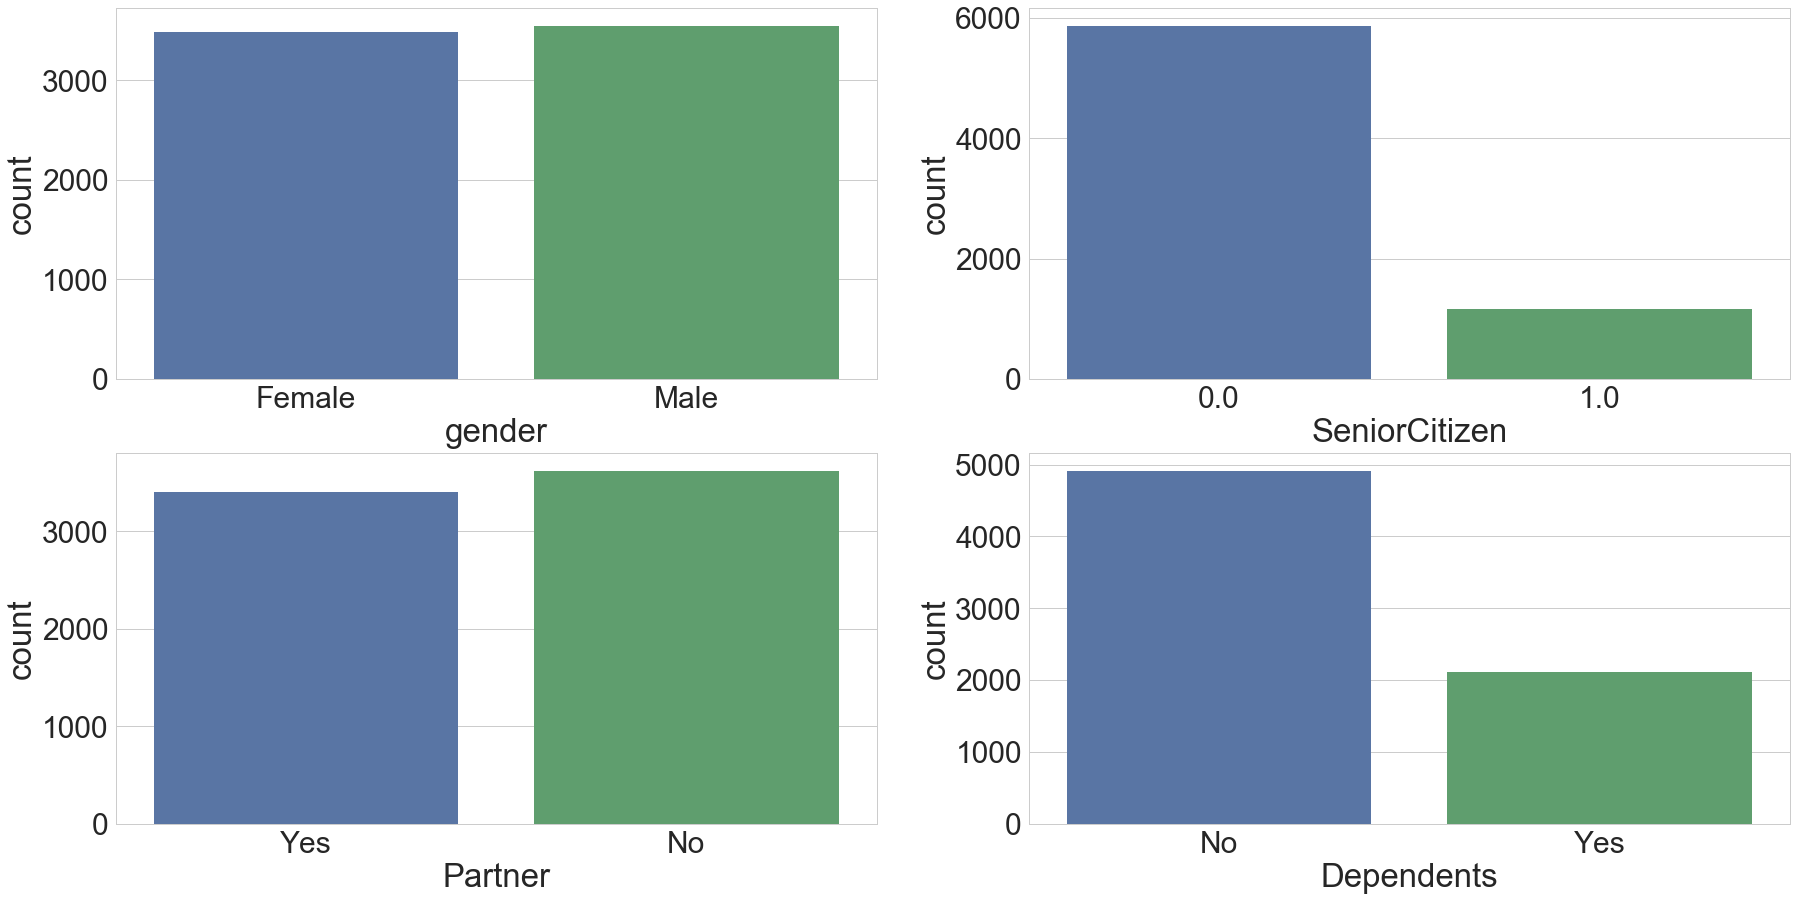

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
sns.set(style="whitegrid", font_scale=3)
for variable, subplot in zip(Categorical_Features[:4], ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    

### Observation : Low Not a Senior Citizen Count 

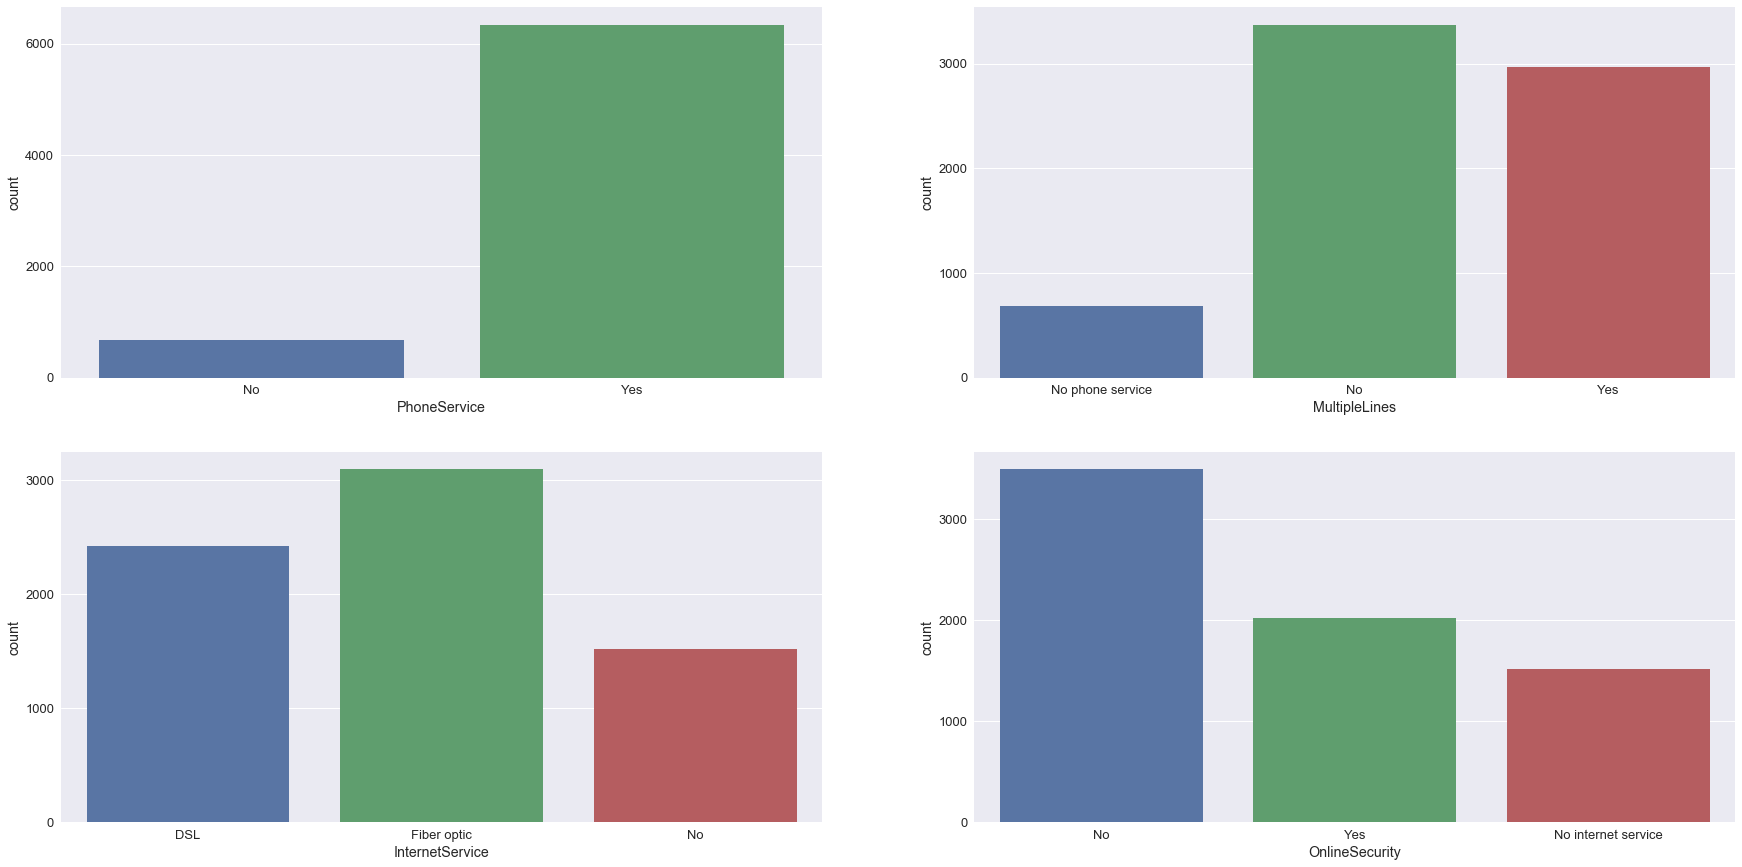

In [98]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
sns.set(style="whitegrid", font_scale=3)
for variable, subplot in zip(Categorical_Features[4:8], ax.flatten()):
    sns.countplot(data[variable], ax=subplot)

### Observation : Low No Phone Service Count

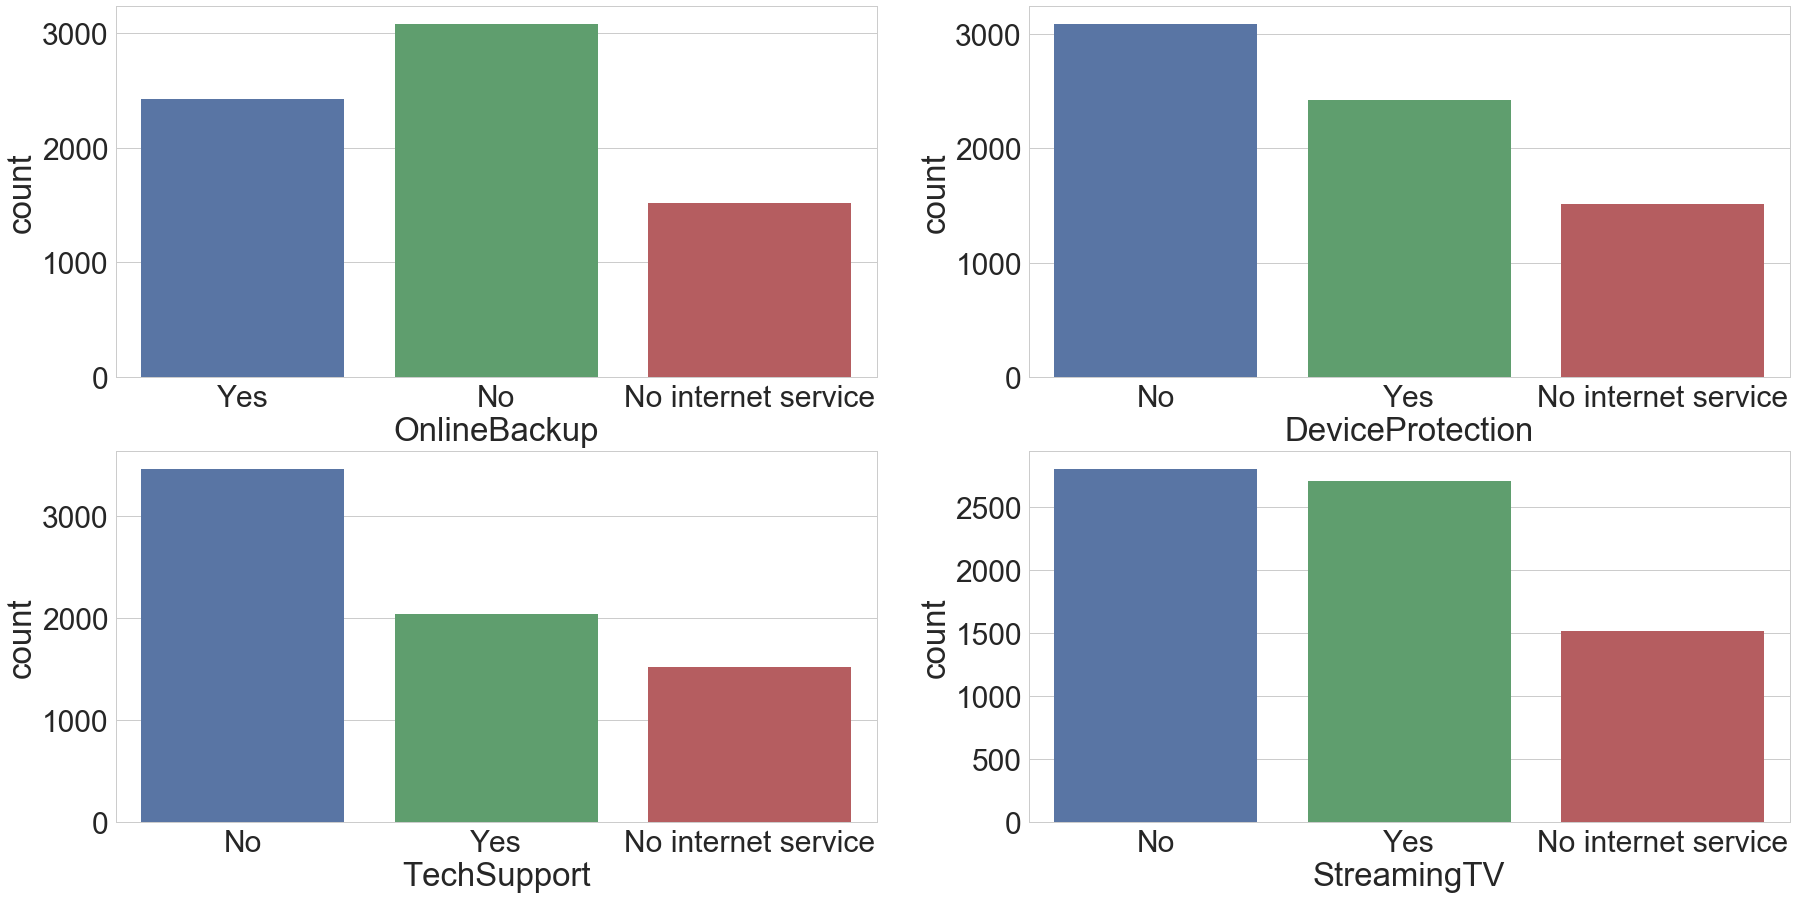

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
sns.set(style="whitegrid", font_scale=3)
for variable, subplot in zip(Categorical_Features[8:12], ax.flatten()):
    sns.countplot(data[variable], ax=subplot)

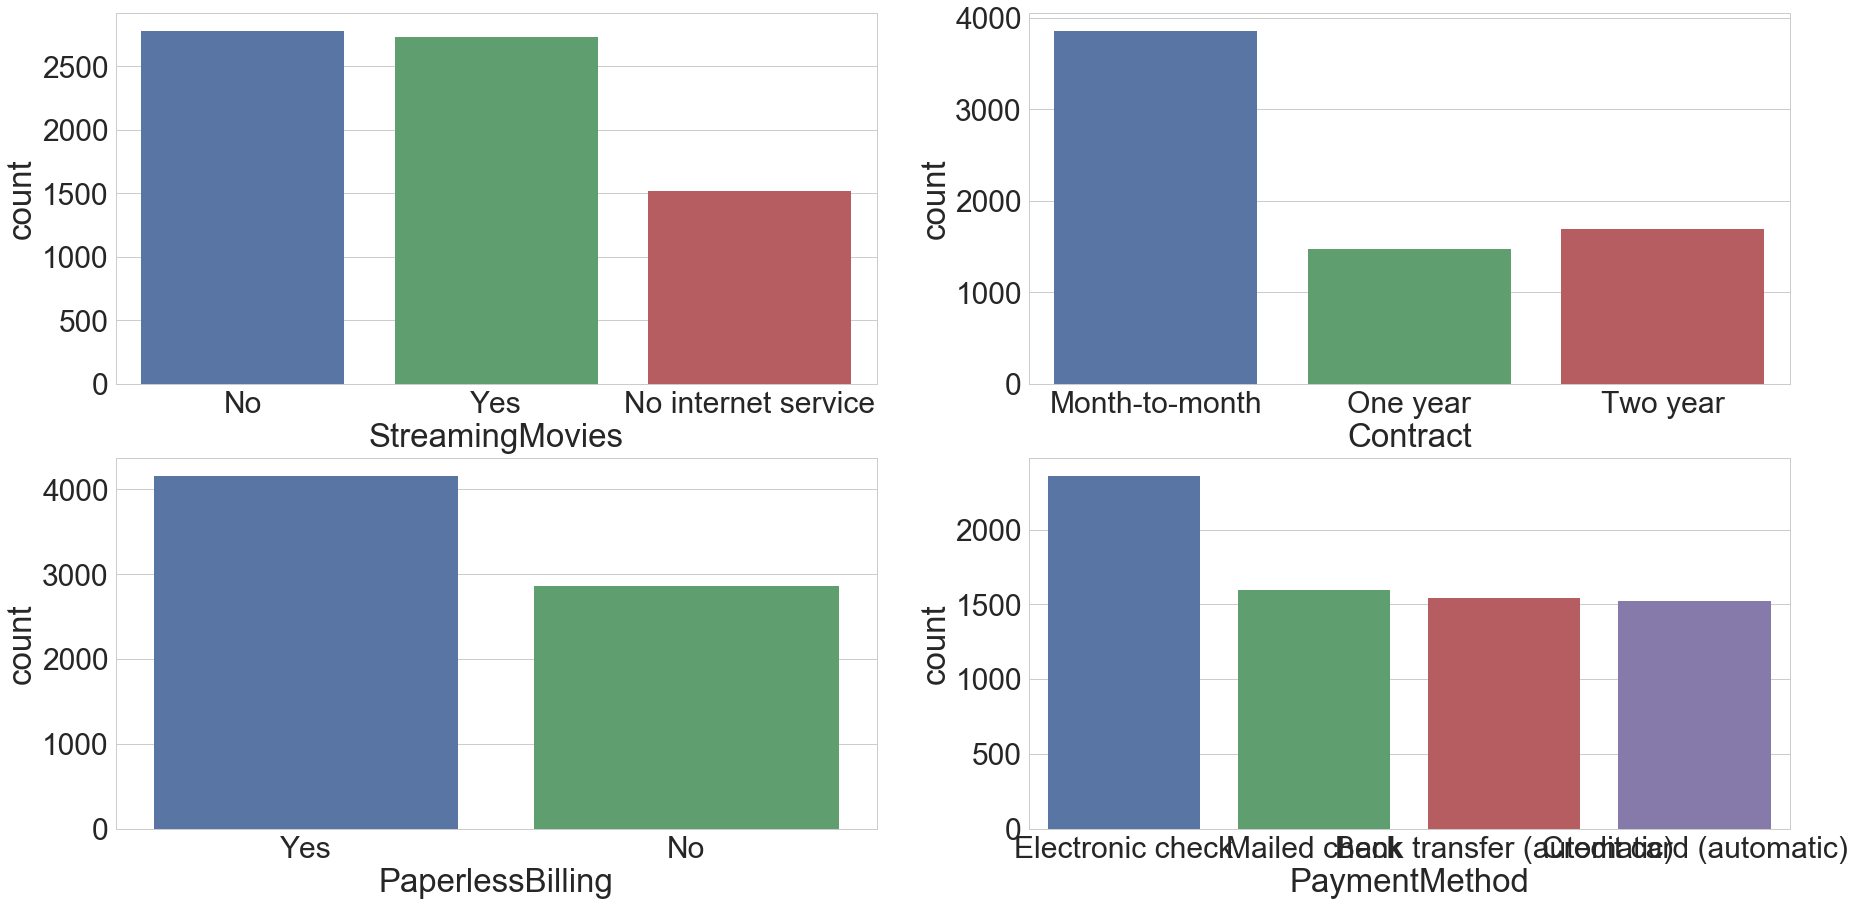

In [80]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))
sns.set(style="whitegrid", font_scale=3)
for variable, subplot in zip(Categorical_Features[12:16], ax.flatten()):
    sns.countplot(data[variable], ax=subplot)

### Relation Between Numerical Features and Target Variable

### We see that that big values of  TotalCharges and tenure indicate that the customer is less proabably to churn which makes sense..the new customers won't be loyal as the old ones nor the ones who pays alot 

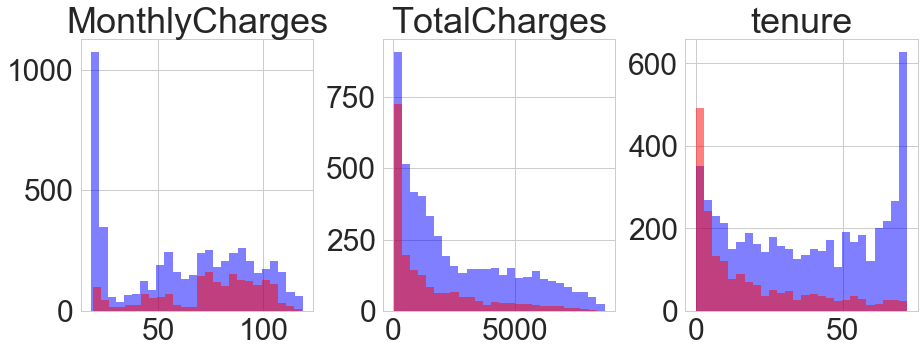

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
data[data['Churn'] == "No"][Numercial_Features].hist(bins=26, color="blue", alpha=0.5, ax=ax);
data[data['Churn'] == "Yes"][Numercial_Features].hist(bins=26, color="red", alpha=0.5, ax=ax);

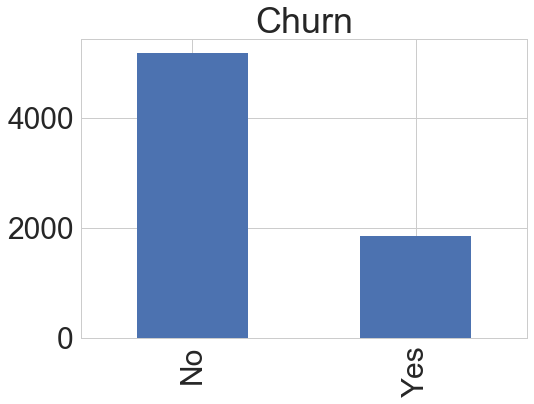

In [103]:
data['Churn'].value_counts().plot(kind = 'bar' , title = "Churn");

### Discretization of Total_Charges


In [31]:
data['Total_Charges_Binned'] = pd.cut(data['TotalCharges'] ,bins = 5)

In [32]:
data['Total_Charges_Binned'].value_counts()

(10.134, 1752.0]    3937
(1752.0, 3485.2]    1190
(3485.2, 5218.4]     866
(5218.4, 6951.6]     705
(6951.6, 8684.8]     345
Name: Total_Charges_Binned, dtype: int64

### Label Encoding and Standarization (After The Analysis of Data)

In [105]:
for c in Categorical_Features:
    data[c] = LabelEncoder().fit_transform(data[c])

In [107]:
data[target] = LabelEncoder().fit_transform(data[target])

In [117]:
for c in Numercial_Features:
    data[c] = StandardScaler().fit_transform(data[c])

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  scale: Equivalent function without the estimator API.
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  for computing the sample variance: Analysis and recommendations."
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if

In [118]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,-1.320177,0,1,0,0,2,0,0,0,0,0,1,2,-1.163263,-0.997356,0
1,1,0,0,0,0.063992,1,0,0,2,0,2,0,0,0,1,0,3,-0.262070,-0.176273,0
2,1,0,0,0,-1.238755,1,0,0,2,2,0,0,0,0,0,1,3,-0.365159,-0.962785,1
3,1,0,0,0,0.511812,0,1,0,2,0,2,2,0,0,1,0,0,-0.749246,-0.197798,0
4,0,0,0,0,-1.238755,1,0,1,0,0,0,0,0,0,0,1,2,0.195177,-0.943578,1


### Feature Selection (Top eight Correlated Features with Target Churn)

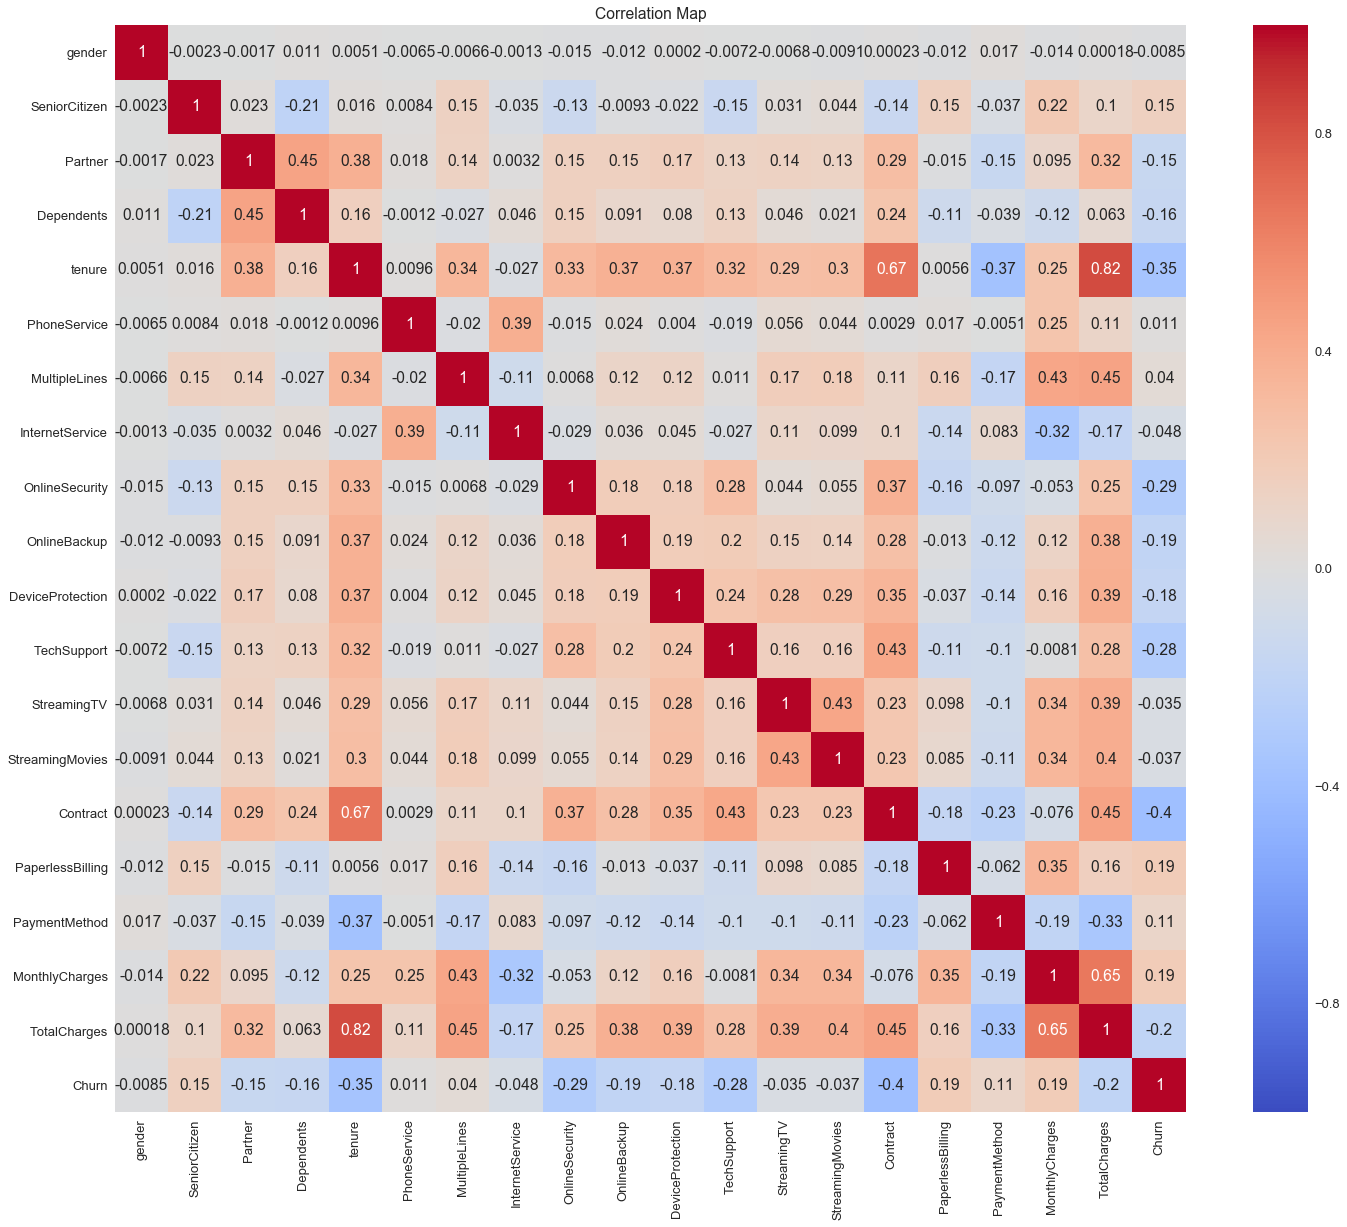

In [122]:
plt.figure(figsize=(24,20))
sns.set(style="whitegrid", font_scale=1.3)
sns.heatmap(data.corr(),cmap='coolwarm',annot = True).set_title('Correlation Map')


In [123]:
Top8Corr = data.corr()['Churn'].sort_values(ascending = False)[1:9].index.values

In [124]:
len(Top8Corr)

8

In [125]:
Top8Corr

array(['MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen',
       'PaymentMethod', 'MultipleLines', 'PhoneService', 'gender',
       'StreamingTV'], dtype=object)

# Questions 

### 1) How many male customers churned from our company?

In [51]:
data.isna().sum()

gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
Total_Charges_Binned    0
dtype: int64

In [33]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [34]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [35]:
len(data[(data['Churn'] == 'Yes') & (data['gender'] == 'Male')])

930

### 2) What is the ratio between males and females in our company?

In [36]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [38]:
#Ratio Of Males 
rm = data['gender'].value_counts()[0] / data['gender'].value_counts().sum()
rm

0.504756495811444

In [39]:
#Ratio Of Females
rf = data['gender'].value_counts()[1] / data['gender'].value_counts().sum()
rf

0.495243504188556

In [40]:
#ratio between the two 
rm / rf

1.0192087155963303

### 3) What is the ratio between churned and others in our company?

In [41]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [42]:
#Ratio Of Churned 
rc = data['Churn'].value_counts()[1] / data['Churn'].value_counts().sum()
rc

0.2653698707936959

In [43]:
#Ratio Of Staying Customers 
rm = data['Churn'].value_counts()[0] / data['Churn'].value_counts().sum()
rm

0.7346301292063041

In [44]:
#ratio between the two
rc/rm

0.3612292230382683

### 4) How many senior citizens churned from our company?

In [45]:
data['SeniorCitizen'].value_counts()

0.0    5883
1.0    1160
Name: SeniorCitizen, dtype: int64

In [46]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [47]:
len(data[(data['SeniorCitizen'] == 1 ) & (data['Churn']  == 'Yes')])

480

### 5) What is the id of the biggest in total charges?


In [48]:
data['TotalCharges'].max()

8684.8

In [49]:
data['TotalCharges'].argmax()

4610

### 6) What is the correlation between monthly charges and total charges?

In [52]:
data['MonthlyCharges'].corr(data['TotalCharges'])

0.6504680406774164

### 7) What is the average payment per month of all users?

In [53]:
data['MonthlyCharges'].mean()

64.76169246059922